###importing library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import MultiColumnLabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as Xgb
import pickle

###Read The Data

In [2]:
data=pd.read_csv("garments_worker_productivity.csv")

In [3]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Correlation Analysis

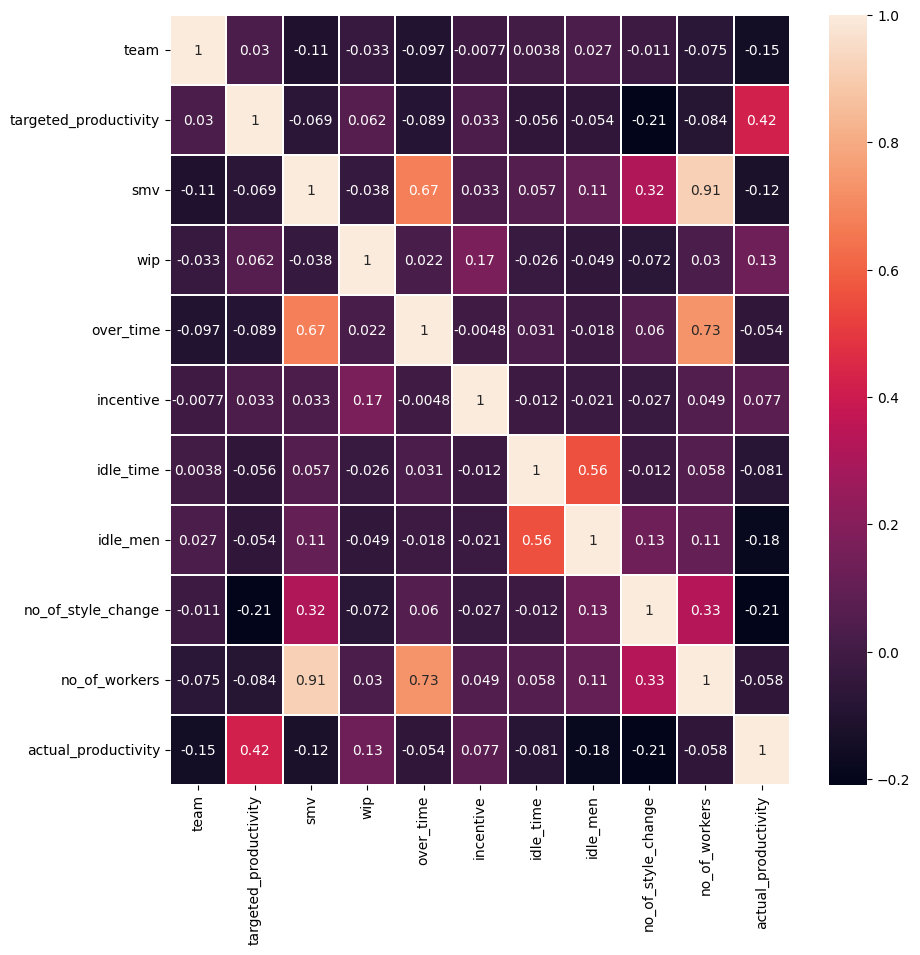

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_data = data.select_dtypes(include='number')
corrMatrix = numeric_data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrMatrix, annot=True, linewidths=0.1, ax=ax)
plt.show()

Descriptive Analysis


In [5]:
#descriptive analysis
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Checking For NULL Value

In [6]:
data.shape
(1197,15)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [7]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [8]:
data.drop(['wip'], axis=1, inplace=True, errors='ignore')

Handling Data & Department Column

In [9]:
data['date'] = pd.to_datetime(data['date'])

In [10]:
data.date

0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, Length: 1197, dtype: datetime64[ns]

In [11]:
print(data.columns)

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')


In [12]:
data['month']=data['date'].dt.month
data.drop(['date'],axis=1, inplace=True)

In [13]:
data.month

0       1
1       1
2       1
3       1
4       1
       ..
1192    3
1193    3
1194    3
1195    3
1196    3
Name: month, Length: 1197, dtype: int32

In [14]:
data['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [15]:
#Finishing department is split into 2, we will merge them into 1
data['department'] = data['department'].apply(lambda X:'finishing' if X.replace("","")=='finishing' else 'sweing')

In [16]:
data['department'].value_counts()

department
sweing       948
finishing    249
Name: count, dtype: int64

Handling Categorical Values

In [17]:
import MultiColumnLabelEncoder
Mcle = MultiColumnLabelEncoder.MultiColumnLabelEncoder()
Data = Mcle.fit_transform(data)

Splitting Data Into Train And Test

In [18]:
x=data.drop(['actual_productivity'],axis=1)
y=data['actual_productivity']


In [19]:
X=x.to_numpy()

In [20]:
X

array([['Quarter1', 'sweing', 'Thursday', ..., 0, 59.0, 1],
       ['Quarter1', 'sweing', 'Thursday', ..., 0, 8.0, 1],
       ['Quarter1', 'sweing', 'Thursday', ..., 0, 30.5, 1],
       ...,
       ['Quarter2', 'finishing', 'Wednesday', ..., 0, 8.0, 3],
       ['Quarter2', 'finishing', 'Wednesday', ..., 0, 15.0, 3],
       ['Quarter2', 'finishing', 'Wednesday', ..., 0, 6.0, 3]],
      shape=(1197, 13), dtype=object)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=0)

Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()

In [23]:
import pandas as pd

def preprocess_input_data(data_array):
    # Step 1: Define column names
    columns = ['Quarter', 'Department', 'Day', 'Feature1', 'Feature2', 'Feature3', 'Feature4',
               'Feature5', 'Feature6', 'Feature7', 'Feature8', 'Feature9', 'TargetCategory']
    
    # Step 2: Convert to DataFrame
    df = pd.DataFrame(data_array, columns=columns)
    
    # Step 3: Convert numeric columns
    numeric_cols = ['Feature1', 'Feature2', 'Feature3', 'Feature4',
                    'Feature5', 'Feature6', 'Feature7', 'Feature8', 'Feature9']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)
    
    # Step 4: Encode categorical columns
    categorical_cols = ['Quarter', 'Department', 'Day']
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    return df_encoded

In [24]:
x_train_encoded = preprocess_input_data(x_train)
model_lr.fit(x_train_encoded, y_train)

LinearRegression()

In [25]:
x_test_encoded = preprocess_input_data(x_test)
x_test_encoded = x_test_encoded.reindex(columns=x_train_encoded.columns, fill_value=0)

In [26]:
pred_test=model_lr.predict(x_test_encoded)
print("test_MSE:",mean_squared_error(y_test, pred_test))
print("test_MAE:",mean_absolute_error(y_test, pred_test))
print("R2_score:{}".format(r2_score(y_test, pred_test)))

test_MSE: 0.5610566052960411
test_MAE: 0.1852563678501054
R2_score:-17.508181649759166
